## Import

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizações iniciais

In [6]:

data = pd.read_csv(r'C:\repositorio\Student-Depression-Prediction-RandomForest\data\raw\Student Depression Dataset.csv')

data.sample(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
15944,80588,Male,22.0,Surat,Student,5.0,0.0,6.74,2.0,0.0,Less than 5 hours,Healthy,B.Com,Yes,10.0,2.0,Yes,1
9429,47565,Male,24.0,Jaipur,Student,3.0,0.0,9.42,4.0,0.0,Less than 5 hours,Moderate,PhD,No,1.0,4.0,No,1
3338,16727,Female,24.0,Surat,Student,3.0,0.0,9.71,1.0,0.0,Less than 5 hours,Unhealthy,B.Ed,No,8.0,2.0,No,0
6377,31951,Female,24.0,Jaipur,Student,5.0,0.0,9.93,2.0,0.0,7-8 hours,Moderate,BA,Yes,7.0,2.0,Yes,0
4408,22120,Male,20.0,Indore,Student,2.0,0.0,8.52,3.0,0.0,More than 8 hours,Unhealthy,Class 12,Yes,7.0,5.0,No,1


### Informações básicas

In [7]:
# Informações gerais sobre o dataset
print("Informações do dataset:")
data.info()

# Verificar valores únicos em cada coluna
print("\nValores únicos por coluna:")
data.nunique()

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 n

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

### Estatísticas descritivas das colunas numéricas

In [ ]:
print("Estatísticas descritivas:")
data.describe()

Estatísticas descritivas:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


### Valores nulos
#### presentes apenas na coluna Financial Stress

In [11]:
# Verificar valores faltantes
print("Valores faltantes por coluna:")
data.isnull().sum()

Valores faltantes por coluna:


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

### Distribuição de gênero e de pensamentos suicídadas 

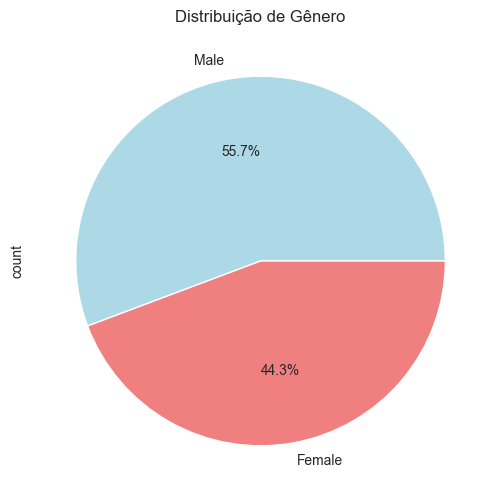

C:\Users\Pichau\AppData\Local\Temp\ipykernel_12008\3552520989.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Have you ever had suicidal thoughts ?', palette='Set2')


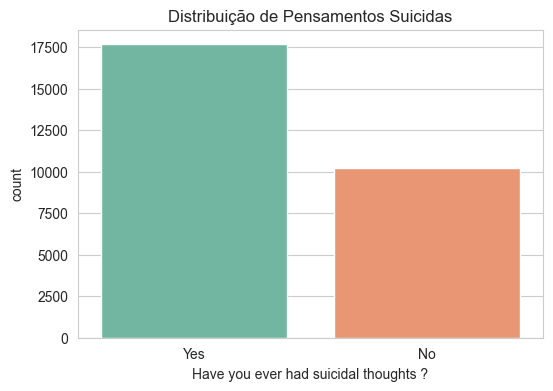

In [36]:
# Distribuição de gênero
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribuição de Gênero')
plt.show()

# Distribuição de 'Have you ever had suicidal thoughts?'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Have you ever had suicidal thoughts ?', palette='Set2')
plt.title('Distribuição de Pensamentos Suicidas')
plt.show()

#### A quantidade de pessoas com pensamentos suicídas é 1,75x vezes maior do que as pessoas que não possuem pensamentos suicídas

### Distribuição das variáveis numéricas

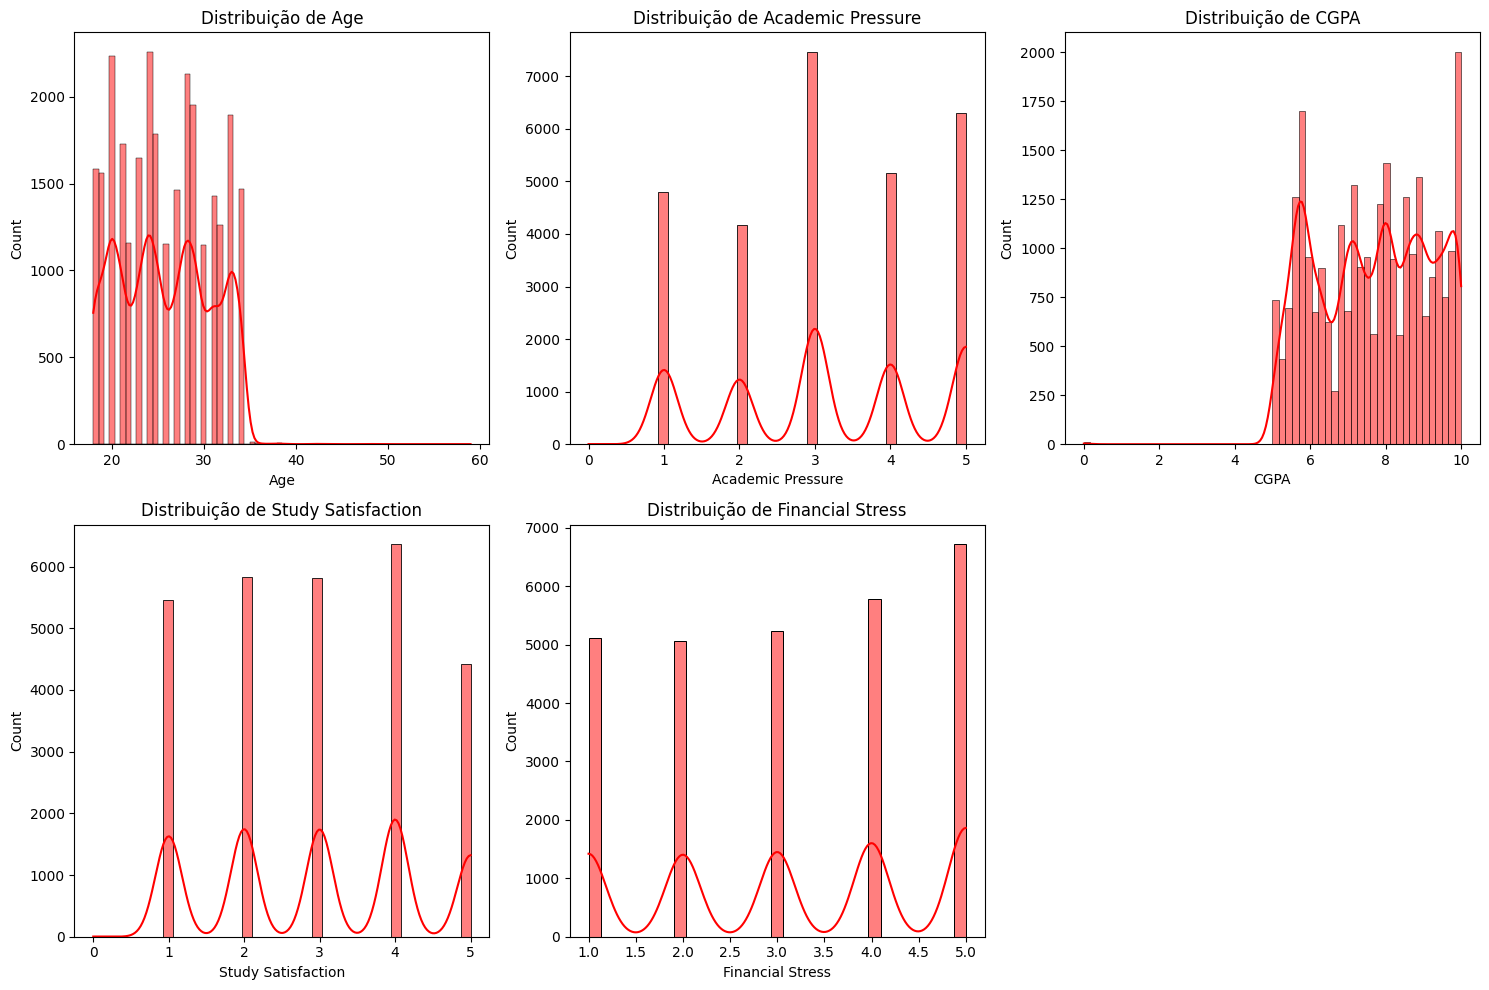

In [15]:
# Histogramas para variáveis numéricas
numerical_columns = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Financial Stress']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, color='red')
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

### Verificando melhor a distribuição da idade
#### Visualmente está indicando um volume grande de outliers

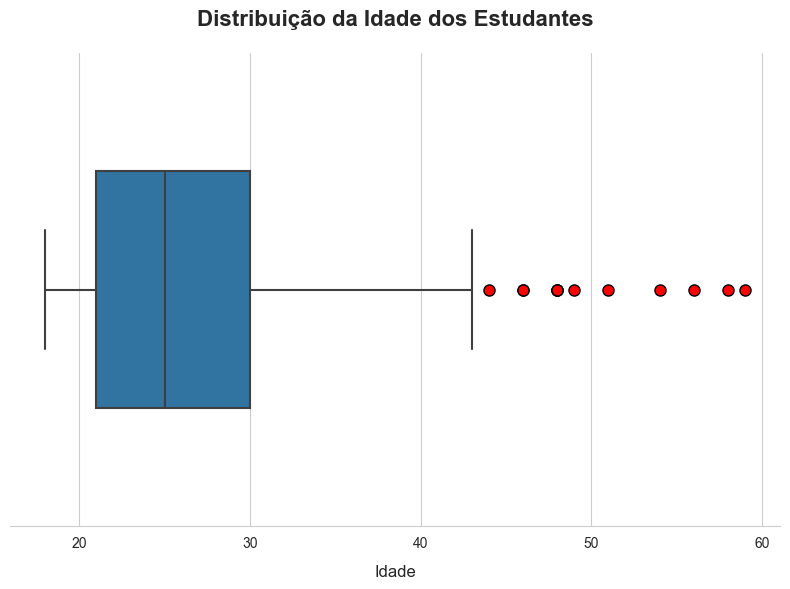

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

#boxplot
sns.boxplot(
    x=data['Age'], 
    color='#1f77b4',
    width=0.5,        
    linewidth=1.5,    
    flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black')
)

# Titulos
plt.title('Distribuição da Idade dos Estudantes', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Idade', fontsize=12, labelpad=10)
plt.ylabel('') 

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True) 
plt.tight_layout()
plt.show()

### Correlação entre as variáveis numéricas 

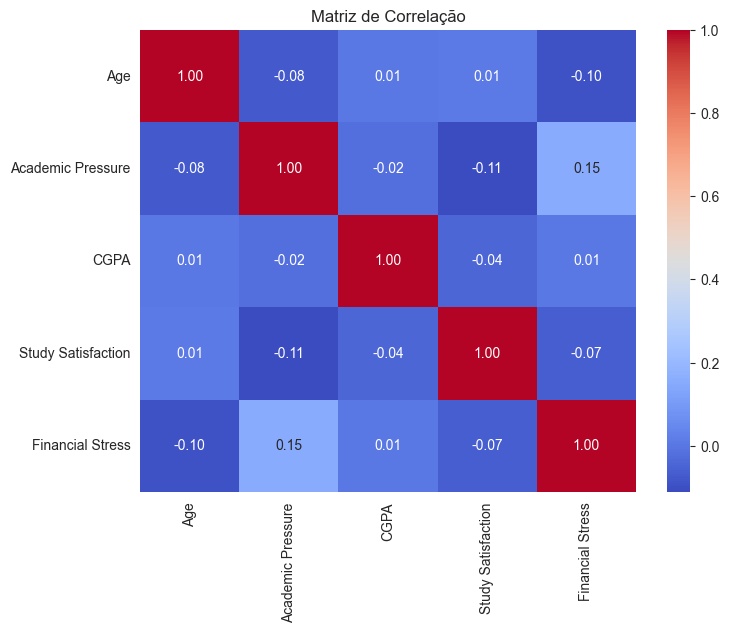

In [26]:
# Matriz de correlação
correlation_matrix = data[numerical_columns].corr()

# Heatmap da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

### Detectando os outliers

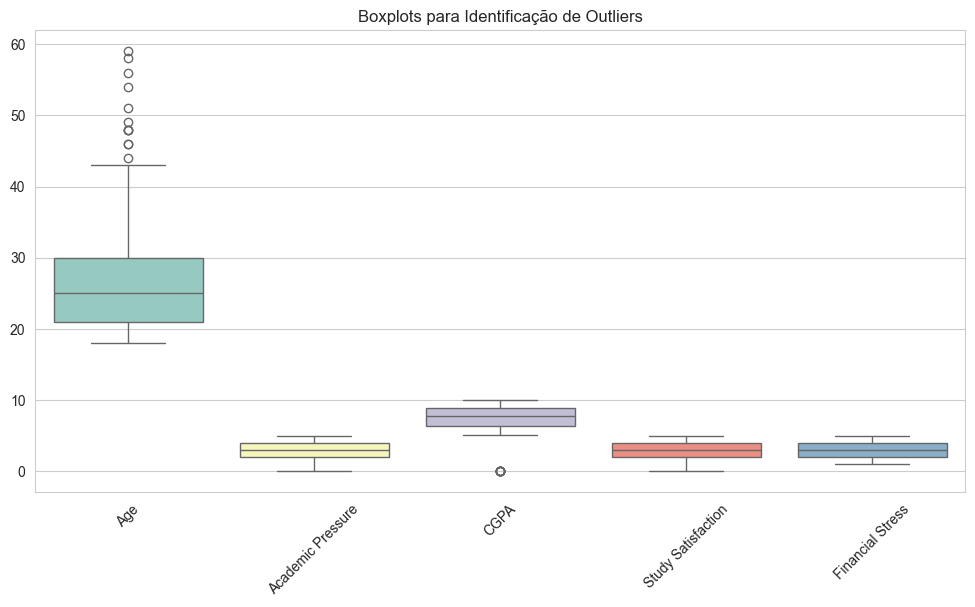

In [27]:
# Boxplots para identificar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns], palette='Set3')
plt.title('Boxplots para Identificação de Outliers')
plt.xticks(rotation=45)
plt.show()

### Visualização de variáveis numéricas sendo agrupadas pelos hábitos alimentares

In [29]:
# Agrupar por 'Dietary Habits' e calcular médias
dietary_analysis = data.groupby('Dietary Habits')[numerical_columns].mean()

print("Análise de Hábitos Alimentares:")
dietary_analysis

Análise de Hábitos Alimentares:


,Age,Academic Pressure,CGPA,Study Satisfaction,Financial Stress
Dietary Habits,,,,,
Healthy,26.104954,2.994511,7.649656,2.998954,2.999346
Moderate,26.021772,3.091221,7.659949,2.919968,3.076101
Others,26.416667,3.083333,7.534167,3.416667,3.166667
Unhealthy,25.420180,3.298149,7.657331,2.925366,3.305351
